In [1]:
import pymt.models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
sns.set(style='whitegrid', font_scale= 1.2)

➡ models: GIPL


In [2]:
gipl = pymt.models.GIPL()

gipl.get_component_name()

'The 1D GIPL Model'

In [3]:
#defaults = gipl.setup('.')
#print(defaults)

In [4]:
gipl.initialize('gipl_config.cfg')

In [5]:
# List input and output variable names.
print(gipl.get_output_var_names())
print(gipl.get_input_var_names())

# Get soil depth: [unit: m]
depth = gipl.get_grid_z(2)
n_depth = int(len(depth))

('soil__temperature', 'model_soil_layer__count')
('land_surface_air__temperature', 'snowpack__depth', 'snow__thermal_conductivity', 'soil_water__volume_fraction', 'soil_unfrozen_water__a', 'soil_unfrozen_water__b')


In [6]:
# Get the length of forcing data:
ntime = int(gipl.bmi.get_end_time())

# Define a variable to store soil temperature through the time period

tsoil = np.zeros((n_depth, ntime)) * np.nan

print('Final soil temperatures will be ', tsoil.shape)

Final soil temperatures will be  (176, 365)


Text(0.5, 1.0, 'Soil Surface (0.0m)')

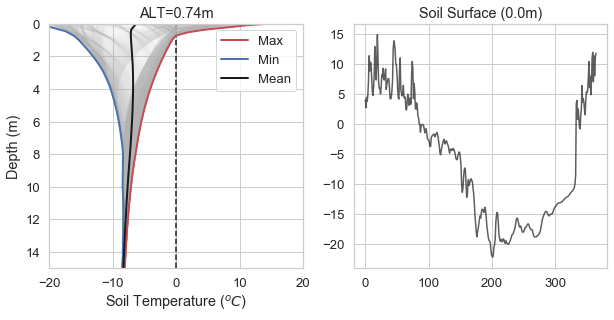

In [7]:
fig = plt.figure(figsize=[10,4.5])
ax = fig.add_subplot(1,2,1)
plt.ylim([15,0])
plt.xlim([-20,20])
plt.xlabel('Soil Temperature ($^oC$)')
plt.ylabel('Depth (m)')
plt.plot([0,0],[15,0],'k--')

for i in np.arange(int(ntime)):
    gipl.update()
    tsoil[:,i] = gipl.get_value('soil__temperature')
    plt.plot(tsoil[depth>=0,i], depth[depth>=0],color = [0.7,0.7,0.7], alpha = 0.1)
    
plt.plot(tsoil[depth>=0,:].max(axis=1), depth[depth>=0], 'r', linewidth = 2, label = 'Max')
plt.plot(tsoil[depth>=0,:].min(axis=1), depth[depth>=0], 'b', linewidth = 2, label = 'Min')
plt.plot(tsoil[depth>=0,:].mean(axis=1), depth[depth>=0], 'k', linewidth = 2, label = 'Mean')
plt.legend()
plt.title('ALT='+str(depth[depth>=0][np.argmin(np.abs(tsoil[depth>=0,:].max(axis=1)))])+'m')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(tsoil[40,:], color = 'k', alpha = 0.7)
plt.title('Soil Surface (0.0m)')

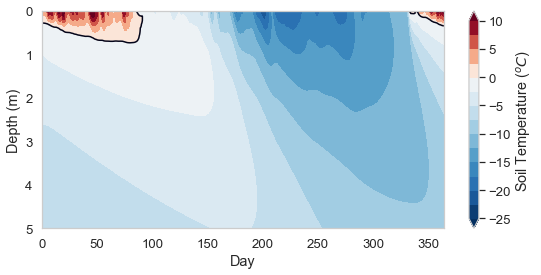

In [8]:
fig = plt.figure(figsize=[9,4])
divnorm = mcolors.DivergingNorm(vmin=-25., vcenter=0., vmax=10)
plt.contourf(np.arange(ntime), depth, tsoil, np.linspace(-25,10,15), 
             norm = divnorm,
             cmap="RdBu_r", extend = 'both')

plt.ylim([5,0])
cb = plt.colorbar()
plt.xlabel('Day')
plt.ylabel('Depth (m)')
cb.ax.set_ylabel('Soil Temperature ($^oC$)')

plt.contour(np.arange(ntime), depth, tsoil, [0]) # ZERO 

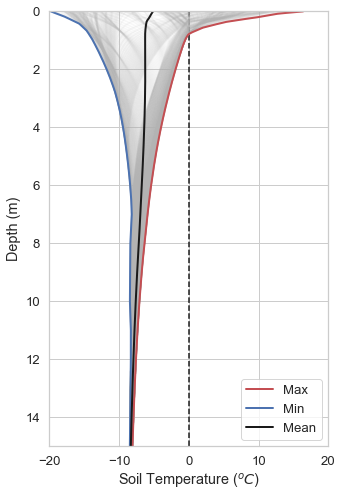

In [9]:
gipl.initialize('gipl_config.cfg')
fig = plt.figure(figsize=[5,8])
plt.ylim([15,0])
plt.xlim([-20,20])
plt.xlabel('Soil Temperature ($^oC$)')
plt.ylabel('Depth (m)')
plt.plot([0,0],[15,0],'k--')

for i in np.arange(int(ntime)):
    tair_raw = gipl.get_value('land_surface_air__temperature')
    gipl.set_value('land_surface_air__temperature', tair_raw + abs(tair_raw)*0.1)
    gipl.update()
    tsoil[:,i] = gipl.get_value('soil__temperature')
    plt.plot(tsoil[depth>=0,i], depth[depth>=0],color = [0.7,0.7,0.7], alpha = 0.1)
    
plt.plot(tsoil[depth>=0,:].max(axis=1), depth[depth>=0], 'r', linewidth = 2, label = 'Max')
plt.plot(tsoil[depth>=0,:].min(axis=1), depth[depth>=0], 'b', linewidth = 2, label = 'Min')
plt.plot(tsoil[depth>=0,:].mean(axis=1), depth[depth>=0], 'k', linewidth = 2, label = 'Mean')
plt.legend()

In [10]:
print(depth[depth>=0][np.argmin(np.abs(tsoil[depth>=0,:].max(axis=1)))])

0.78
